In [2]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight') #add the specific style we want : fivethirtyeight.
import matplotlib.pyplot as plt #add the pyplot module, a dependency that provides a MATLAB-like plotting framework

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

Base.classes.keys()

['measurement', 'station']

In [6]:
# Use the Inspector to explore the database and print the table names
from sqlalchemy import create_engine, inspect, func
inspector=inspect(engine)
inspector.get_table_names()

########Get a list of column names and types
columns = inspector.get_columns("measurement")
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
engine.execute("SELECT * FROM Measurement LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [8]:
# Get the last date entry for column "date"
end_date=(session.query(Measurement.date).order_by(Measurement.date.desc()).first())
end_date



('2017-08-23',)

In [9]:
#Get the first date in the "date" column
start_date = (session.query(Measurement.date).order_by(Measurement.date.asc()).first())
start_date

('2010-01-01',)

## D1: Determine the Summary Statistics for June

In [10]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

 
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)=='6').all()




[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [11]:
#  3. Convert the June temperatures to a list.
temp_june=[]
temp_june=session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
temp_june

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [12]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(temp_june, columns=['Date','June Temps'])
df_june.set_index(df_june['Date'], inplace=True)
df_june.head()


,Date,June Temps
Date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0


In [13]:
# print the sorted list without the index

print(df_june.to_string)

<bound method DataFrame.to_string of                   Date  June Temps
Date                              
2010-06-01  2010-06-01        78.0
2010-06-02  2010-06-02        76.0
2010-06-03  2010-06-03        78.0
2010-06-04  2010-06-04        76.0
2010-06-05  2010-06-05        77.0
...                ...         ...
2017-06-26  2017-06-26        79.0
2017-06-27  2017-06-27        74.0
2017-06-28  2017-06-28        74.0
2017-06-29  2017-06-29        76.0
2017-06-30  2017-06-30        75.0

[1700 rows x 2 columns]>


In [14]:
#set index to the date column previously, and sort the results
df_june = df_june.sort_index() #this will sort out the values by date
df_june.to_string(index=False)

print(df_june.to_string(index=False)) 

      Date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


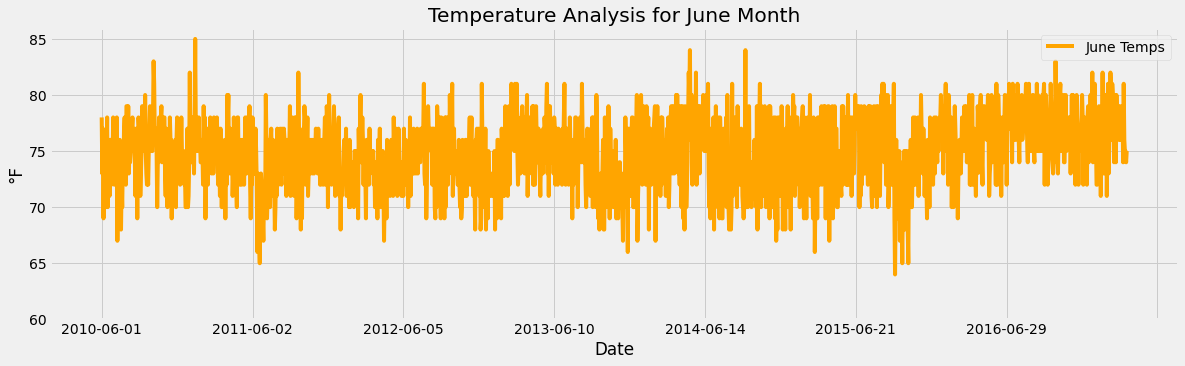

In [16]:

df_june.plot(title='Temperature Analysis for June Month', color='orange', figsize=(18,5))
plt.legend(loc= 'upper right')
plt.ylim(60,86)
plt.ylabel("°F")
plt.savefig("Output1_Temp_june.png")
plt.show()

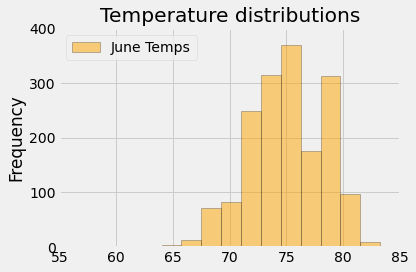

In [28]:

df_june.plot.hist(title= 'Temperature distributions', bins=12, facecolor='orange', edgecolor='black', alpha=0.5)
plt.xlim([55,85])
plt.ylim([0,400])
plt.tight_layout()  
plt.savefig("Output2_Temp_jun_distribution")


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)=='12').all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [19]:
# 7. Convert the December temperatures to a list.
temp_dec=[]
temp_dec=session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)=='12').all()

In [20]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(temp_dec, columns=['Date','Dec Temps'])
df_dec.set_index(df_dec['Date'], inplace=True)
df_dec.tail()

,Date,Dec Temps
Date,,
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0
2016-12-30,2016-12-30,65.0
2016-12-31,2016-12-31,65.0


In [21]:
df_dec = df_dec.sort_index() #this will sort out the values by date
print(df_dec.to_string(index=False))

#note that there is no data for dec month for year 2017, since our data file only has recorded upto 2017-08-23

      Date  Dec Temps
2010-12-01       76.0
2010-12-01       73.0
2010-12-01       72.0
2010-12-01       78.0
2010-12-01       72.0
2010-12-01       70.0
2010-12-01       71.0
2010-12-01       73.0
2010-12-02       71.0
2010-12-02       71.0
2010-12-02       73.0
2010-12-02       75.0
2010-12-02       74.0
2010-12-02       72.0
2010-12-02       74.0
2010-12-02       70.0
2010-12-03       67.0
2010-12-03       74.0
2010-12-03       70.0
2010-12-03       74.0
2010-12-03       71.0
2010-12-03       74.0
2010-12-03       72.0
2010-12-03       73.0
2010-12-04       75.0
2010-12-04       72.0
2010-12-04       77.0
2010-12-04       74.0
2010-12-04       74.0
2010-12-04       78.0
2010-12-04       74.0
2010-12-05       66.0
2010-12-05       69.0
2010-12-05       71.0
2010-12-05       78.0
2010-12-05       73.0
2010-12-05       73.0
2010-12-05       69.0
2010-12-06       65.0
2010-12-06       61.0
2010-12-06       61.0
2010-12-06       64.0
2010-12-06       66.0
2010-12-06       78.0
2010-12-06

In [22]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


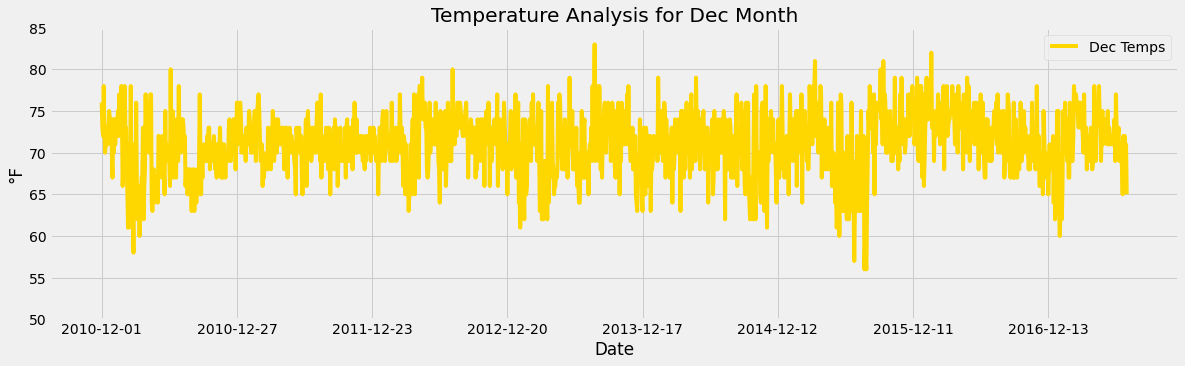

In [23]:
df_dec.plot(title='Temperature Analysis for Dec Month', color='gold', figsize=(18,5))
plt.legend(loc= 'upper right')
plt.ylim(50,85)
plt.ylabel('°F')
plt.savefig("Output4_Temp_Dec.png")
plt.show()

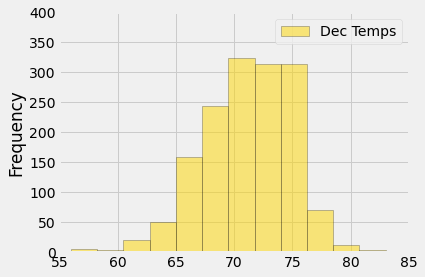

In [29]:
df_dec.plot.hist(bins=12, facecolor='gold', edgecolor='black', alpha=0.5)   # bins should be between 5-20
plt.tight_layout() 
plt.xlim([55,85])
plt.ylim([0,400])
plt.savefig("Output5_dec_temp_distribution")

# Precipitation for June and December


In [40]:
# create a list for jun and dec percipitations

prcp_june=[]
prcp_june=session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)=='6').all()

prcp_dec=[]
prcp_dec=session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date)=='12').all()

#Create a DataFrame from the list of temperatures for the month of December. 
df_june_prcp = pd.DataFrame(prcp_june, columns=['Date',' June prcp[inches]'])
df_june_prcp.set_index(df_june_prcp['Date'], inplace=True)


#Create a DataFrame from the list of temperatures for the month of December. 
df_dec_prcp = pd.DataFrame(prcp_dec, columns=['Date',' Dec prcp[inches]'])
df_dec_prcp.set_index(df_dec_prcp['Date'], inplace=True)



In [41]:
# sort out the indices by date value
df_june_prcp = df_june_prcp.sort_index() #this will sort out the values by date
df_june_prcp.to_string(index=False)

print(df_june_prcp.to_string(index=False))

      Date   June prcp[inches]
2010-06-01                0.00
2010-06-01                0.01
2010-06-01                0.00
2010-06-01                 NaN
2010-06-01                0.03
2010-06-01                0.00
2010-06-01                0.00
2010-06-01                0.08
2010-06-01                0.03
2010-06-02                0.00
2010-06-02                0.03
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.03
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.00
2010-06-02                0.01
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.10
2010-06-03                0.00
2010-06-03                0.14
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.00
2010-06-03                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-04                0.00
2010-06-

In [42]:
# sort out the indices by date value
df_dec_prcp = df_dec_prcp.sort_index() #this will sort out the values by date
df_dec_prcp.to_string(index=False)

print(df_dec_prcp.to_string(index=False))


      Date   Dec prcp[inches]
2010-12-01               0.04
2010-12-01               0.03
2010-12-01               0.70
2010-12-01               0.03
2010-12-01               1.35
2010-12-01               0.13
2010-12-01               1.48
2010-12-01               0.76
2010-12-02                NaN
2010-12-02               0.16
2010-12-02               0.06
2010-12-02               0.26
2010-12-02               0.00
2010-12-02               0.13
2010-12-02               0.02
2010-12-02               0.18
2010-12-03               1.59
2010-12-03               0.01
2010-12-03               0.78
2010-12-03               0.00
2010-12-03               0.22
2010-12-03               0.01
2010-12-03               0.47
2010-12-03               0.16
2010-12-04               0.00
2010-12-04               0.00
2010-12-04               0.19
2010-12-04               0.00
2010-12-04               0.00
2010-12-04               0.00
2010-12-04               0.00
2010-12-05               0.00
2010-12-05

In [43]:
df_june_prcp.describe()

,June prcp[inches]
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [44]:
df_dec_prcp.describe()

,Dec prcp[inches]
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


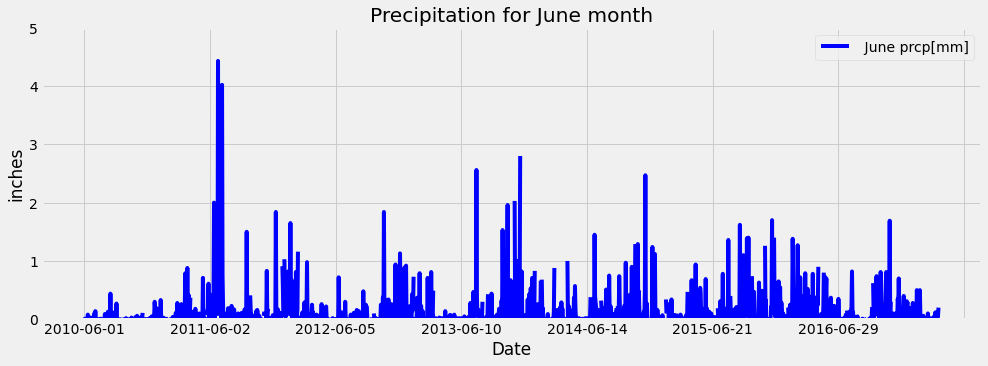

In [36]:
df_june_prcp.plot(title='Precipitation for June month', color='blue', figsize=(15,5))
plt.legend(loc= 'upper right')
plt.ylim(0,5)

plt.ylabel('inches')
plt.savefig("Output7_precipitation_june")
#fig.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':' June prcp[inches]'}>]],
      dtype=object)

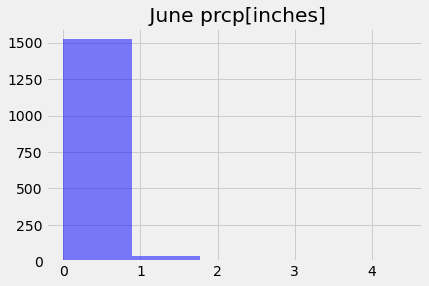

In [45]:
df_june_prcp.hist(bins=5, facecolor='blue', alpha=0.5)   # bins should be between 5-20
 

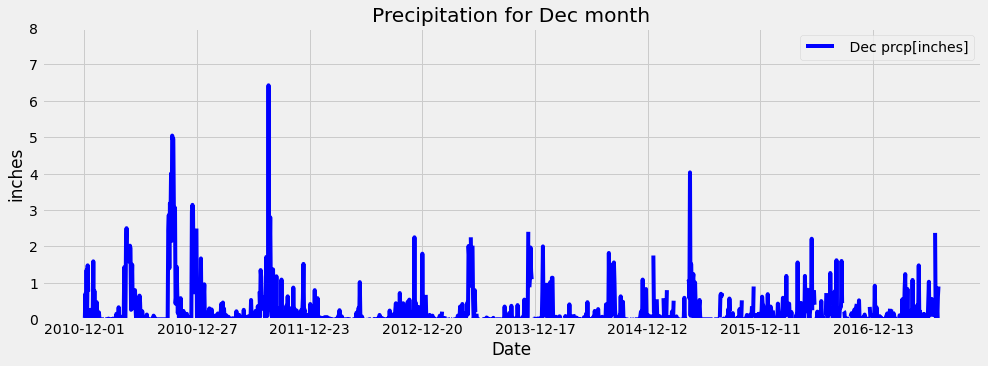

In [46]:
df_dec_prcp.plot(title='Precipitation for Dec month', color='blue', figsize=(15,5))
plt.legend(loc= 'upper right')
plt.ylim(0,8)
plt.ylabel('inches')
plt.savefig('Output9_precipitation_dec')
#fig.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':' Dec prcp[inches]'}>]], dtype=object)

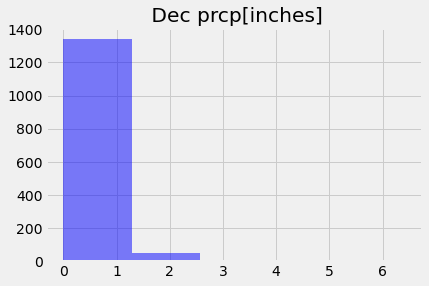

In [47]:
df_dec_prcp.hist(bins=5, facecolor='blue', alpha=0.5)   # bins should be between 5-20
